# Name: Ian Ruvuto Kampwanyi

# Computational Physics  Nagel-Schreckenberg model of traffic flow

### For this problem, I modelled an animation using a circle and scatter plots on the circle. For this I first named the following constants

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

##### Note here the array cars, is an array of lists of size 3 where position 0 = x coordinate, position 1 = y coordinate, and position 2 = velocity of the car

In [2]:
#Radius
R = 10

#maximum velocity
max_v = 5/R

#dawdle probability
p = 0

#Initial number of cars 
N = 4

# Make an array of lists storing car states
# the 1st stores the x position of the cell, 2nd y position of the cell, and 3rd the velocity
cars = [[]]

#array of points x and y
ptx = [0]
pty = [0]


#### Following the model of the professor, in order to successfuly obtain results we define several function that will be needed to track each car in the circular or ring path

#### Below are three functions that are part of the steps for each single car. Note Here the dist function works as if you are calculating the arc length from 1point(car) to another point(next car)

In [3]:
#function dist returns the distance btn a car and the next one
def dist(car_next, car_rn):
    #strt = math.sqrt((R*(car_next[0]-car_rn[0])**2)+((R*(car_next[1]-car_rn[1])**2)))
    angle = np.cos(car_next[0]) - np.cos(car_rn[0])
    if (angle < 0):
        angle = 2+angle
    distance = (angle*np.pi)*R
    return distance

#defining a function to append cars in the circle
def add_cars(num):
    for i in range(num):
        frst = random.uniform(0.00,6.28)
        frst = round(frst,2)
        cars.append(point_def(frst, frst, 1/R))
    return num

#arraning cars according to points
def arrange(num):
    a = 0
    i = 0
    while i < num-1:
        if (cars[i][0]>cars[i+1][0]):
            temp = cars[i][0]
            cars[i][0] = cars[i+1][0]
            cars[i][1] = cars[i+1][1]
            cars[i+1][0] = temp
            cars[i+1][1] = temp
            i = -1
        i = i + 1
        a = a + 1
    print (a)

#### From the question we also implement the dawdle probablity. For this we call a random function btn 0 and 1 and if the value is less or equal to the limit provided then we add a 1 to the current velocity of the car

In [4]:
#dawdle_probabilty
def dawdle(lim):
    check = random.uniform(0.00,1.00)
    if (check <= lim):
        return 1
    else:
        return 0

#### To model this we need to perform a certain number of function for each car in each step. The function works such that each cars velocity depend on if the car is at the maximum velocoity -in this case the velocity is increased by one if the car is not at max velocity. And also if the distance of the next car is smaller than the velocity of the car itself -in this case we reduce the velocity to the distance itself

In [5]:
#next step function
def next_step(num):
    for i in range(num):
        #1st check
        if cars[i][2] < max_v:
            if i == num-1:
                cars[i][2] = round((cars[i][2] + 1/R),2) 
            else:
                cars[i][2] = round((cars[i][2] + 1/R),2) 

        #2nd check
        if i == num-1:
            #print(cars[0]," ", cars[i])
            distance = dist(cars[0], cars[i])
            """ print("the distance is ", distance) """
        else:
            #print(cars[i+1]," ", cars[i])
            distance = dist(cars[i+1], cars[i])
        if distance < cars[i][2]:
            cars[i][2] = round(distance/R,2) - 0.000001 #this is for accuracy to avoid the car to go infront of the other

        #3rd check with dawdle probability
        check = dawdle(p)
        if(check == 1):
            cars[i][2] = cars[i][2] - 1/R
        

def next_place(num):
    for i in range(num):
        cars[i][0] = cars[i][0] + (cars[i][2]/R)
        cars[i][1] = cars[i][1] + (cars[i][2]/R)

#### Now That we are done with the most important function of the algorithms itself we now need to perform initialisation of the cars into points consisting of cos and sin in order to form a ring movement

In [6]:
#Function for point initialisation
def pt_init(num):
    for i in range(num-1):
        ptx.append(0)
        pty.append(0)
        
def point_init(arr, num):
    for i in range(num):
        ptx[i] = R*np.cos(arr[i][0]) 
        pty[i] = R*np.sin(arr[i][1])


def point_def(pointx, pointy, velocity):
    temp = [pointx, pointy,velocity]
    return temp

### Now we can start by drawing the circular path for cars by using x as a cos function and y as a sine function

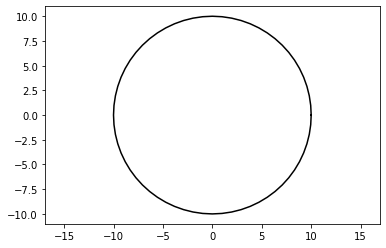

In [7]:
#number of edges
n = 64

#subdivide intervals
t = np.linspace(0, 2*np.pi, n+1)

#x and y arrays of the points on the ring path for the cars
x = R*np.cos(t)
y = R*np.sin(t)

#Display the circle
grid = plt.figure()
plt.axis("equal")
plt.plot(x, y, 'k')

### Part a)
#### Simulate a traffic jam with 5 of 15 cars and p = 0.0. The rest of the cars are to be distributed randomly with a random initial velocity.

In [8]:
p = 0
N = 5
cars[0] = (point_def(0.4, 0.4, 1/R)) 
cars.append(point_def(0.8, 0.8, 1/R))
cars.append(point_def(1.2, 1.2, 1/R))
cars.append(point_def(1.6, 1.6, 1/R))
cars.append(point_def(1.8, 1.8, 1/R))

#initialising all cars and points before looping the motion
N = N + add_cars(15)
arrange(N)
pt_init(N)

601


#### Now we implement a loop updating every cars position to obtain an animation

In [9]:
from matplotlib.animation import FuncAnimation

def init_func():
    plt.clf()

def update_plot(i):
    plt.clf()
    point_init(cars, N)
    plt.plot(x, y, 'k')
    plt.scatter(ptx, pty, 15)
    text = "Time t = "+ str(i)+ "s"
    grid.text(0.45,0.50, text)
    next_step(N)
    next_place(N)

anim = FuncAnimation(grid, update_plot, frames=np.linspace(0, 2*np.pi, n+1), init_func= init_func, interval=30)

##### Please note if the animation cannot run on the jupyter notebook. Please run the code Animation1.py included in the folder.

### Observation for part a):  Run Animation1.py
#### -From the animation we observe the Nagel-Schreckenberg model of traffic flow. 
#### -We see there are time when we have the highest density of cars (more cars crowded together) and we observe cars slowing down casuing the cars behind them to slow down as well.
#### -We also observe lowest density of cars(less cars on the road) and in this case the car moves at maximum velocity until it reaches the high density region of cars

#### Now we double the cars to 30: Run Animation1.2.py

### Part b)
#### Simulate a traffic jam with 5 of 15 cars and p = 0.3. The rest of the cars are to be distributed randomly with a random initial velocity.
#### For this please run the code Animation2.py included in the folder.

### Observation for part b):
#### -We observe that some cars get very packed together. In other words there is a very high density of cars as time passes by. In addition due to the algorithm we also observe that some cars go out of the respective ordered cell. In that case this causes more of cars crushing to each other.


### For a better observation of the explanation run Animation3.py which has a dawdle probability of 0.6 (much higher).